In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dropout,Dense,Flatten,MaxPooling2D,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,f1_score,precision_score,confusion_matrix

In [2]:
# reading the datasets
def load_dataset():
    train_data = h5py.File('./train_happy.h5', "r")
    x_train = np.array(train_data["train_set_x"][:]) 
    y_train = np.array(train_data["train_set_y"][:]) 

    test_data = h5py.File('./test_happy.h5', "r")
    x_test = np.array(test_data["test_set_x"][:])
    y_test = np.array(test_data["test_set_y"][:]) 
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return x_train, y_train, x_test, y_test

In [3]:
X_train, Y_train, X_test, Y_test = load_dataset()

In [4]:
# preparing the data
X_train = X_train/255.
X_test = X_test/255.
Y_train = Y_train.T
Y_test = Y_test.T

In [5]:
# spliting the testset into validation and test sets
X_val,X_test,Y_val,Y_test = train_test_split(X_test,Y_test)

In [6]:
print("train size: {}".format(X_train.shape[0]))
print("validation size: {}".format(X_val.shape[0]))
print("test size: {}".format(X_test.shape[0]))

train size: 600
validation size: 112
test size: 38


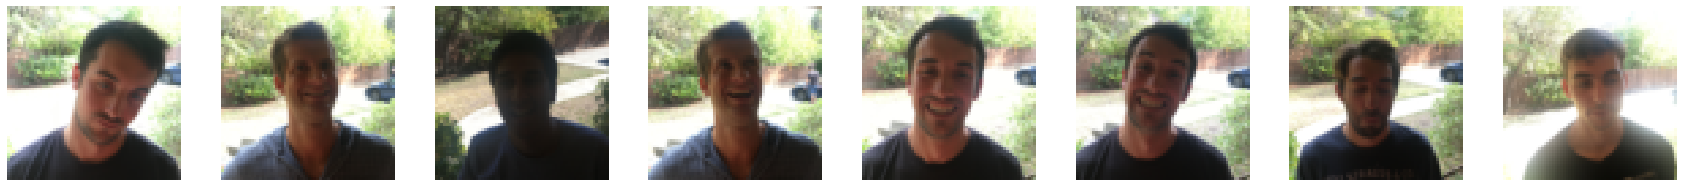

In [7]:
# plotting some images
sample = []
for s in range(8):
    sample.append(X_train[s])


plt.figure(figsize=(30,30))
for n in range(len(sample)):
  plt.subplot(8,8,n+1)
  plt.imshow((sample[n]))
  plt.axis('off')

In [8]:
# building the model architecture
model = Sequential()

# first layer
model.add(Conv2D(kernel_size=(3,3),filters=16,activation='relu',input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

# second layer
model.add(Conv2D(kernel_size=(3,3),filters=16,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

# third layer
model.add(Conv2D(kernel_size=(3,3),filters=16,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

# fully connected layer with dropout
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

# compiling the model with adam optimizer and binary cross entropy loss
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
# training the model
epochs = 30
batch_size = 16
trained_model = model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_val,Y_val),shuffle=True)

Train on 600 samples, validate on 112 samples
Epoch 1/30
600/600 [==============================] - 3s 4ms/sample - loss: 0.6351 - accuracy: 0.7217 - val_loss: 0.7047 - val_accuracy: 0.5089
Epoch 2/30
600/600 [==============================] - 0s 407us/sample - loss: 0.1742 - accuracy: 0.9350 - val_loss: 0.7689 - val_accuracy: 0.4375
Epoch 3/30
600/600 [==============================] - 0s 409us/sample - loss: 0.1533 - accuracy: 0.9433 - val_loss: 0.7000 - val_accuracy: 0.5714
Epoch 4/30
600/600 [==============================] - 0s 404us/sample - loss: 0.1210 - accuracy: 0.9533 - val_loss: 1.2076 - val_accuracy: 0.4375
Epoch 5/30
600/600 [==============================] - 0s 407us/sample - loss: 0.0933 - accuracy: 0.9650 - val_loss: 1.2728 - val_accuracy: 0.4554
Epoch 6/30
600/600 [==============================] - 0s 406us/sample - loss: 0.1220 - accuracy: 0.9583 - val_loss: 2.1266 - val_accuracy: 0.4375
Epoch 7/30
600/600 [==============================] - 0s 406us/sample - loss: 0.

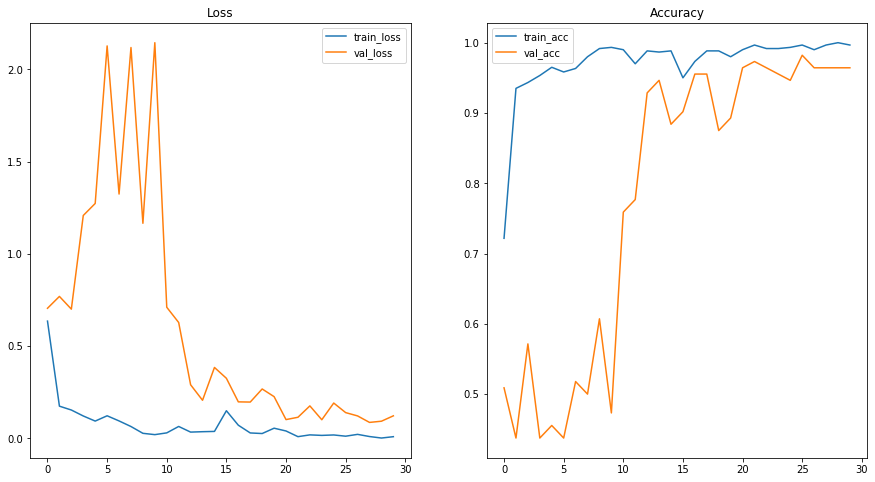

In [10]:
# plotting the loss and accuracy curve for each phase
train_loss = trained_model.history['loss']
val_loss = trained_model.history['val_loss']
train_acc = trained_model.history['accuracy']
val_acc = trained_model.history['val_accuracy']

epochs_range = range(epochs)

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(epochs_range,train_loss,label="train_loss")
plt.plot(epochs_range,val_loss,label="val_loss")
plt.legend(loc=0)
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(epochs_range,train_acc,label="train_acc")
plt.plot(epochs_range,val_acc,label="val_acc")
plt.legend(loc=0)
plt.title("Accuracy")

plt.show()

In [11]:
# evaluating the model on the test set
model.evaluate(X_test,Y_test,verbose=1)

38/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.20970106752295242, 0.94736844]

In [12]:
pred = model.predict_classes(X_test)

In [13]:
# precision,recall and f1 scores
print("Precision: {:.4f}".format(precision_score(Y_test,pred)))
print("Recall: {:.4f}".format(recall_score(Y_test,pred)))
print("F1_Score: {:.4f}".format(f1_score(Y_test,pred)))

Precision: 0.9524
Recall: 0.9524
F1_Score: 0.9524


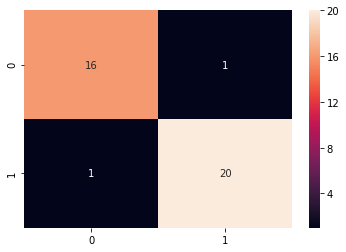

In [14]:
# plotting the confusion matrix to see more details
import seaborn
confusion_matrix = confusion_matrix(Y_test,pred)
seaborn.heatmap(confusion_matrix,annot=True)